<a href="https://colab.research.google.com/github/srijasriramdas/ML/blob/main/ml_assign_2_165.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Optimized K-Means Clustering for Customer Segmentation using Dimensionality Reduction**

In [ ]:
#Dataset used: Mall Customers Dataset (freely available; can upload CSV or load via URL).

In [20]:
# Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully")


✅ Libraries imported successfully


In [21]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns)
df.info()
df.describe()


Shape of dataset: (200, 5)

Columns:
 Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [23]:
# Check missing values
df.isnull().sum()

# View sample rows
df.sample(5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
16,17,Female,35,21,35
162,163,Male,19,81,5
73,74,Female,60,50,56
92,93,Male,48,60,49
85,86,Male,48,54,46


In [24]:
#preprocessing

# Drop CustomerID and encode Gender numerically
df = df.drop('CustomerID', axis=1)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Scale numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


In [25]:
#Dimensionality Reduction(PCS)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)

pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df.head()

print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.33690046 0.26230645]


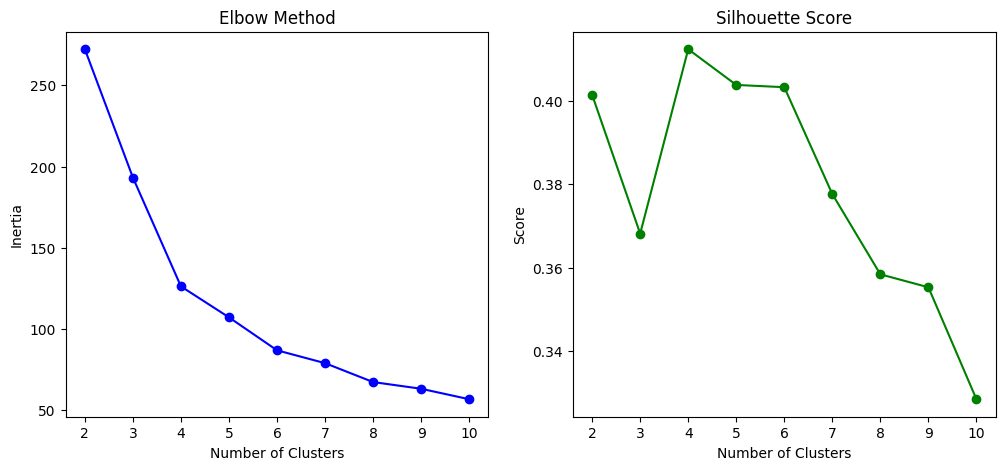

In [26]:
inertia = []
silhouette = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(pca_df, kmeans.labels_))

# Plot elbow and silhouette side by side
fig, ax1 = plt.subplots(1, 2, figsize=(12, 5))

ax1[0].plot(K, inertia, 'bo-')
ax1[0].set_title('Elbow Method')
ax1[0].set_xlabel('Number of Clusters')
ax1[0].set_ylabel('Inertia')

ax1[1].plot(K, silhouette, 'go-')
ax1[1].set_title('Silhouette Score')
ax1[1].set_xlabel('Number of Clusters')
ax1[1].set_ylabel('Score')

plt.show()


In [27]:
optimal_k = 5  # change if another value looks better

kmeans_opt = KMeans(
    n_clusters=optimal_k,
    init='k-means++',   # smarter initialization
    max_iter=500,
    n_init=20,
    random_state=42
)
cluster_labels = kmeans_opt.fit_predict(pca_df)
pca_df['Cluster'] = cluster_labels

print("Silhouette Score for optimized model:", silhouette_score(pca_df[['PC1','PC2']], cluster_labels))


Silhouette Score for optimized model: 0.3877934284115026


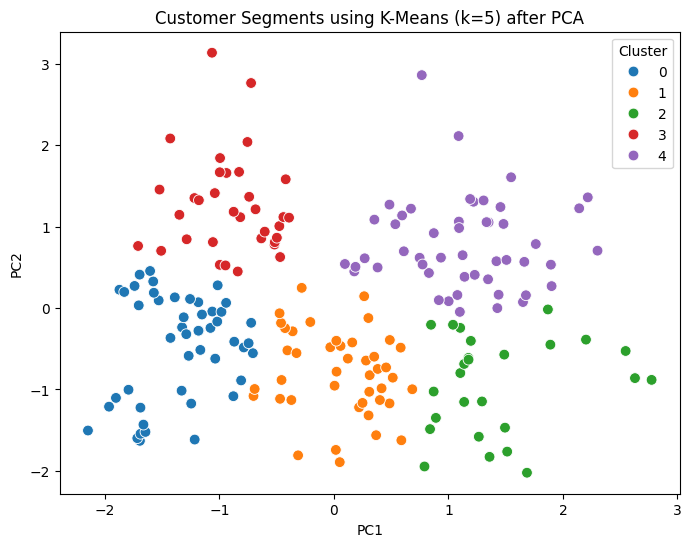

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pca_df,
    x='PC1', y='PC2',
    hue='Cluster', palette='tab10', s=60
)
plt.title(f'Customer Segments using K-Means (k={optimal_k}) after PCA')
plt.show()


In [29]:
final_df = pd.concat([df, pca_df['Cluster']], axis=1)
cluster_summary = final_df.groupby('Cluster').mean().round(2)
cluster_summary


,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,0.83,26.67,49.92,73.40
1,0.91,39.72,49.58,43.65
2,0.73,55.38,43.77,24.12
3,0.18,29.91,81.50,73.88
4,0.16,47.45,75.00,30.63


Agglomerative Clustering Silhouette Score: 0.346


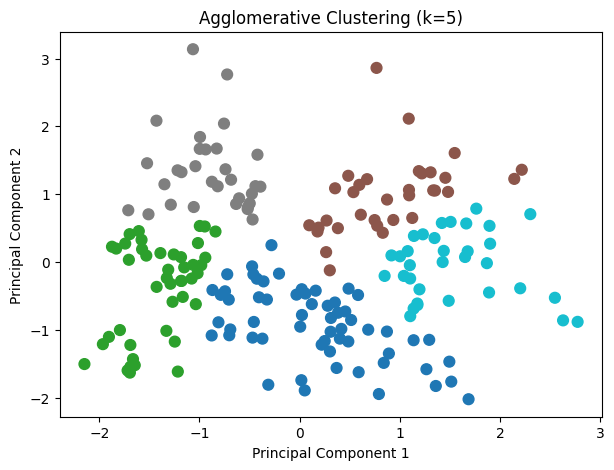

In [31]:
# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

agg = AgglomerativeClustering(n_clusters=5)
agg_labels = agg.fit_predict(pca_df[['PC1', 'PC2']])

agg_score = silhouette_score(pca_df[['PC1', 'PC2']], agg_labels)
print("Agglomerative Clustering Silhouette Score:", round(agg_score, 3))

# Visualization
plt.figure(figsize=(7,5))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=agg_labels, cmap='tab10', s=60)
plt.title('Agglomerative Clustering (k=5)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


DBSCAN Silhouette Score: N/A


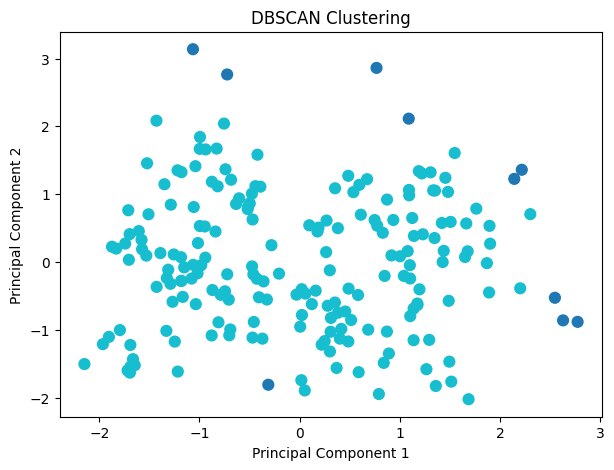

In [32]:
# DBSCAN Clustering
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
db_labels = dbscan.fit_predict(pca_df[['PC1', 'PC2']])

# Handle case when DBSCAN produces noise (-1 labels)
unique_labels = set(db_labels)
if len(unique_labels) > 1 and -1 not in unique_labels:
    db_score = silhouette_score(pca_df[['PC1', 'PC2']], db_labels)
elif len(unique_labels) > 2:  # ignore noise
    db_score = silhouette_score(pca_df[['PC1', 'PC2']], db_labels[db_labels != -1])
else:
    db_score = "N/A"

print("DBSCAN Silhouette Score:", db_score)

# Visualization
plt.figure(figsize=(7,5))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=db_labels, cmap='tab10', s=60)
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Spectral Clustering Silhouette Score: 0.363


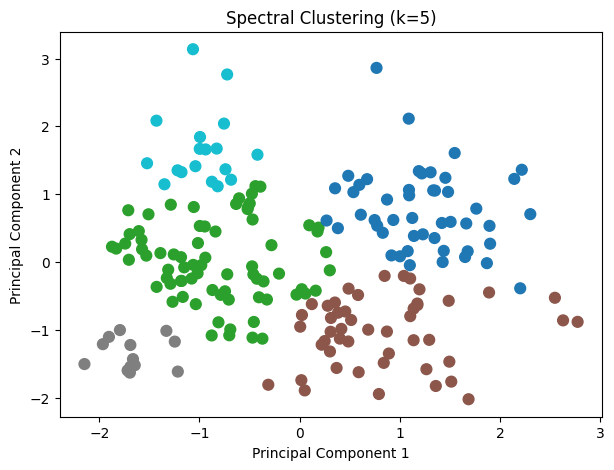

In [33]:
# Spectral Clustering
from sklearn.cluster import SpectralClustering

spec = SpectralClustering(n_clusters=5, random_state=42, assign_labels='kmeans')
spec_labels = spec.fit_predict(pca_df[['PC1', 'PC2']])

spec_score = silhouette_score(pca_df[['PC1', 'PC2']], spec_labels)
print("Spectral Clustering Silhouette Score:", round(spec_score, 3))

# Visualization
plt.figure(figsize=(7,5))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=spec_labels, cmap='tab10', s=60)
plt.title('Spectral Clustering (k=5)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [34]:
# Compare all methods
comparison = pd.DataFrame({
    'Algorithm': ['K-Means (Optimized)', 'Agglomerative', 'DBSCAN', 'Spectral'],
    'Silhouette Score': [
        round(silhouette_score(pca_df[['PC1', 'PC2']], cluster_labels), 3),
        round(agg_score, 3),
        db_score if db_score != "N/A" else "N/A",
        round(spec_score, 3)
    ]
})

comparison


,Algorithm,Silhouette Score
0,K-Means (Optimized),0.388
1,Agglomerative,0.346
2,DBSCAN,N/A
3,Spectral,0.363
